In [1]:
from CPT.model import *
from CPT.utils import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Define global variables
all_genes = ['CALM1', 'TPK1', 'MTHR', 'SUMO1', 'UBC9']

### Regression performance on DMS

In [4]:
# Load DMS data
feat_mat, label = load_data(all_genes, binarize = False)

Loaded 1962 variants in CALM1
Loaded 3424 variants in TPK1
Loaded 11947 variants in MTHR
Loaded 1801 variants in SUMO1
Loaded 2721 variants in UBC9


In [5]:
# Table: performance on DMS genes
feat_selected = {}
corr = {}
corr['CPT-1'] = {}

for test_gene in all_genes:
    print('Test on gene', test_gene)
    train_genes = list(set(all_genes) - set([test_gene]))

    # select features using training genes
    feat_selected[test_gene] = select_feat_by_category(feat_mat, label, train_genes, 
                                                       model = 'regressor', tol = 2e-3, verbose = False)
    
    # predict on the test gene
    cpt = CPTRegressor()
    cpt.train(feat_mat, label, train_genes, feat_selected[test_gene])
    pred = cpt.predict(feat_mat[test_gene][feat_selected[test_gene]])
    corr['CPT-1'][test_gene] = round(stats.spearmanr(pred, label[test_gene])[0], 4)

corr = pd.DataFrame(corr).transpose()
corr['Avg'] = corr.mean(axis = 1)
corr_mat = cross_validate(feat_mat, label, all_genes, model = 'regressor',
                          feat_performance = True).drop(['transfer_model'], axis = 0)
corr_mat = corr_mat.loc[['esm_1v'] + eve_feats + msa_feats + struct_feats + mpnn_feats]
corr_mat = pd.concat([corr, corr_mat])
corr_mat

Test on gene CALM1
All selected features: ['esm_1v', 'evolutionary_index_ASM', '100verte_mut_freq', '30mammal_mut_freq', 'vanilla_protmpnn_norm', 'conditioned_mt_score', 'BLOSUM1', 'Z1', 'BLOSUM7']
Test on gene TPK1
All selected features: ['esm_1v', 'evolutionary_index_ASM', '100verte_mut_freq', '30mammal_mut_freq', 'vanilla_protmpnn_norm', 'conditioned_wt_score', 'BLOSUM1', 'Z1', 'ST6']
Test on gene MTHR
All selected features: ['esm_1v', 'evolutionary_index_ASM', '100verte_mut_freq', '30mammal_mut_freq', 'vanilla_protmpnn_norm', 'conditioned_wt_score', 'BLOSUM1', 'ST6', 'VHSE3', 'MSWHIM2']
Test on gene SUMO1
All selected features: ['esm_1v', 'evolutionary_index_ASM', '100verte_mut_freq', '30mammal_wt_freq', 'vanilla_protmpnn_norm', 'conditioned_wt_score', 'PP1', 'Z5']
Test on gene UBC9
All selected features: ['esm_1v', 'evolutionary_index_ASM', '100verte_mut_freq', '30mammal_mut_freq', 'vanilla_protmpnn_norm', 'conditioned_wt_score', 'BLOSUM7', 'KF5', 'VHSE7', 'KF10']


,CALM1,MTHR,SUMO1,TPK1,UBC9,Avg
CPT-1,0.29700,0.33150,0.63690,0.37200,0.57800,0.44308
esm_1v,0.31811,0.31443,0.58013,0.39565,0.55790,0.43324
EVE_scores_ASM,-0.29145,-0.29295,-0.60559,-0.31403,-0.57433,0.41567
evolutionary_index_ASM,-0.29114,-0.29389,-0.61464,-0.31599,-0.57464,0.41806
100verte_gap_freq,-0.04541,-0.25709,0.20035,0.01087,-0.02229,0.02271
100verte_wt_freq,-0.01560,-0.13102,-0.19360,-0.12562,0.03904,0.08536
100verte_mut_freq,0.21690,0.16231,0.37367,0.34208,0.26276,0.27154
30mammal_gap_freq,0.04414,-0.18624,0.09755,-0.04367,-0.01413,0.02047
30mammal_wt_freq,NaN,-0.07664,-0.11220,-0.09827,NaN,0.09570
30mammal_mut_freq,0.21239,0.13859,0.37505,0.30426,0.29887,0.26583


#### Test on more genes from ProteinGym

In [6]:
# Predict more genes in ProteinGym?
extra_genes = ['KCNH2', 'SCN5A', 'SC6A4', 'RASH', 'SYUA', 'PTEN', 
               'VKOR1', 'A4', 'P53', 'MSH2', 'TPOR', 'BRCA1', 'YAP1']

for gene in extra_genes:
    feat_mat[gene] = pd.read_csv(f'./data/additional_dms/feat_mat_{gene}.csv', index_col = 0)
    label[gene] = pd.read_csv(f'./data/additional_dms/score_{gene}.csv', index_col = 0)

In [7]:
# Table: performance on additional DMS genes
feat_selected = {}
corr = {}
corr['CPT-1'] = {}

feat_selected_dms = select_feat_by_category(feat_mat, label, all_genes, 
                                            model = 'regressor', tol = 2e-3, verbose = True)

# predict on the test gene
cpt = CPTRegressor()
cpt.train(feat_mat, label, all_genes, feat_selected_dms)

for test_gene in extra_genes:
    pred = cpt.predict(feat_mat[test_gene][feat_selected_dms])
    corr['CPT-1'][test_gene] = round(stats.spearmanr(pred, label[test_gene])[0], 4)

corr = pd.DataFrame(corr).transpose()
corr['Avg'] = corr.mean(axis = 1)
corr_mat = cross_validate(feat_mat, label, extra_genes, model = 'regressor',
                          feat_performance = True).drop(['transfer_model'], axis = 0)
corr_mat = corr_mat.loc[['esm_1v'] + eve_feats + msa_feats + struct_feats + mpnn_feats]
corr_mat = pd.concat([corr, corr_mat])
corr_mat

Selecting features in the category 100verte_msa


100%|██████████| 7/7 [00:02<00:00,  2.90it/s]


Best features: ('100verte_mut_freq',) Avg metric on DMS: 0.43916
Selecting features in the category 30mammal_msa


100%|██████████| 7/7 [00:02<00:00,  2.94it/s]


Best features: ('30mammal_mut_freq',) Avg metric on DMS: 0.43848
Selecting features in the category mpnn


100%|██████████| 7/7 [00:02<00:00,  2.88it/s]


Best features: ('vanilla_protmpnn_norm',) Avg metric on DMS: 0.44035
Selecting features in the category struct


100%|██████████| 3/3 [00:01<00:00,  2.58it/s]


Best features: ('conditioned_wt_score',) Avg metric on DMS: 0.43922
0 ['BLOSUM1'] 0.44357
1 ['BLOSUM1', 'ST6'] 0.44641
2 ['BLOSUM1', 'ST6', 'VHSE6'] 0.44772
All selected features: ['esm_1v', 'evolutionary_index_ASM', '100verte_mut_freq', '30mammal_mut_freq', 'vanilla_protmpnn_norm', 'conditioned_wt_score', 'BLOSUM1', 'ST6', 'VHSE6']


,A4,BRCA1,KCNH2,MSH2,P53,PTEN,RASH,SC6A4,SCN5A,SYUA,TPOR,VKOR1,YAP1,Avg
CPT-1,0.44860,0.56860,0.39270,0.42080,0.56080,0.51350,0.47560,0.57190,0.12080,0.30390,0.44760,0.53960,0.54890,0.454869
esm_1v,0.43529,0.44976,0.29482,0.40018,0.55259,0.45422,0.40489,0.54230,0.13549,0.26653,0.39967,0.47378,0.44075,0.403870
EVE_scores_ASM,-0.34342,-0.51509,-0.02333,-0.39441,-0.45182,-0.35965,-0.48025,-0.51973,-0.08233,-0.15615,-0.35242,-0.46381,-0.61665,0.366080
evolutionary_index_ASM,-0.34342,-0.51581,-0.02826,-0.39429,-0.45070,-0.36404,-0.48051,-0.52316,-0.08465,-0.15515,-0.35242,-0.46536,-0.61665,0.367260
100verte_gap_freq,0.40694,-0.13666,NaN,0.11625,0.63874,0.08372,0.09417,0.20864,0.14001,0.15293,0.03194,0.12481,-0.17067,0.140900
100verte_wt_freq,-0.26228,-0.42326,0.14871,-0.24381,-0.28606,-0.27595,0.04578,-0.31523,0.00902,-0.05549,-0.13236,-0.21957,-0.53608,0.195890
100verte_mut_freq,0.12902,0.35669,0.03142,0.14522,0.08369,0.11979,0.01903,0.23295,0.06214,0.05274,0.23124,0.24640,0.16544,0.144290
30mammal_gap_freq,NaN,0.03888,NaN,-0.13148,0.32798,0.10798,-0.05327,-0.10774,NaN,-0.16243,0.09576,0.05007,NaN,0.018420
30mammal_wt_freq,-0.12259,-0.32339,NaN,-0.15667,-0.29898,-0.06172,-0.03278,-0.25351,NaN,-0.06260,-0.24962,-0.19417,-0.06870,0.165880
30mammal_mut_freq,0.05700,0.25054,NaN,0.04734,0.03044,0.02878,0.04751,0.09252,NaN,0.02429,0.14787,0.14808,0.04505,0.083580


### Classification performance on ClinVar

In [8]:
# Load DMS data and binaize
feat_mat, label = load_data(all_genes, binarize = True, quantile = 0.4)

Loaded 785 positive variants and 785 negative variants in CALM1
Loaded 1370 positive variants and 1370 negative variants in TPK1
Loaded 4769 positive variants and 4779 negative variants in MTHR
Loaded 720 positive variants and 721 negative variants in SUMO1
Loaded 1088 positive variants and 1089 negative variants in UBC9


In [9]:
# Load cross-gene imputed DMS data and binaize
feat_mat_xgi, label_xgi = load_data(all_genes, binarize = True, quantile = 0.4, cross_impute = True)

Loaded 785 positive variants and 785 negative variants in CALM1
Loaded 1370 positive variants and 1370 negative variants in TPK1
Loaded 4769 positive variants and 4779 negative variants in MTHR
Loaded 720 positive variants and 721 negative variants in SUMO1
Loaded 1088 positive variants and 1089 negative variants in UBC9


In [10]:
# Select features based on DMS experiment labels
feat_selected_dms = select_feat_by_category(feat_mat, label, all_genes)

Selecting features in the category 100verte_msa


100%|██████████| 7/7 [00:13<00:00,  1.91s/it]


Best features: ('100verte_mut_freq',) Avg metric on DMS: 0.78502
Selecting features in the category 30mammal_msa


100%|██████████| 7/7 [00:03<00:00,  1.81it/s]


Best features: ('30mammal_mut_freq',) Avg metric on DMS: 0.78406
Selecting features in the category mpnn


100%|██████████| 7/7 [00:04<00:00,  1.46it/s]


Best features: ('vanilla_protmpnn_norm',) Avg metric on DMS: 0.78406
Selecting features in the category struct


100%|██████████| 3/3 [00:02<00:00,  1.41it/s]


Best features: ('conditioned_wt_score',) Avg metric on DMS: 0.78364
0 ['BLOSUM1'] 0.78655
1 ['BLOSUM1', 'ST6'] 0.7887
2 ['BLOSUM1', 'ST6', 'VHSE6'] 0.79004
All selected features: ['esm_1v', 'evolutionary_index_ASM', '100verte_mut_freq', '30mammal_mut_freq', 'vanilla_protmpnn_norm', 'conditioned_wt_score', 'BLOSUM1', 'ST6', 'VHSE6']


#### Load ClinVar benchmark dataset

In [11]:
x = pd.read_csv('./data/since2017_one_star_clinvar_x.csv', index_col = 0)
y = pd.read_csv('./data/since2017_one_star_clinvar_y.csv', index_col = 0)
# pred_VESPAl = pd.read_csv('./data/since2017_one_star_clinvar_VESPAl_pred.csv', index_col = 0)
# pred_GEMME = pd.read_csv('./data/since2017_one_star_clinvar_GEMME_pred.csv', index_col = 0)

#### Run benchmark

In [12]:
# Determine features positively/negatively associated with variant effect using DMS results
auroc_feat = {}
for gene in all_genes:
    auroc_feat[gene] = {}
    for feat in feat_mat[gene].columns:
        auroc_feat[gene][feat] = roc_auc_score(label[gene], feat_mat[gene][feat])
auroc_feat = pd.DataFrame(auroc_feat)
auroc_feat['Avg'] = auroc_feat.mean(axis = 1)
pos_feats = auroc_feat[auroc_feat['Avg'] < 0.5].index.to_list()
neg_feats = auroc_feat[auroc_feat['Avg'] >= 0.5].index.to_list()
print(f"Positive features: {pos_feats}")
print(f"Negative features: {neg_feats}")

Positive features: ['evolutionary_index_ASM', 'EVE_scores_ASM', 'PP1', 'KF1', 'KF2', 'KF4', 'KF5', 'KF6', 'Z1', 'Z2', 'Z3', 'Z4', 'Z5', 'F5', 'T1', 'T2', 'T3', 'VHSE2', 'VHSE3', 'VHSE4', 'VHSE6', 'VHSE7', 'VHSE8', 'ProtFP2', 'ProtFP3', 'ST1', 'ST2', 'ST5', 'ST6', 'ST7', 'ST8', 'BLOSUM1', 'BLOSUM2', 'BLOSUM5', 'BLOSUM9', 'BLOSUM10', 'MSWHIM1', 'MSWHIM3', '100verte_gap_freq', '100verte_wt_freq', '30mammal_gap_freq', '30mammal_wt_freq', 'conditioned_wt_score']
Negative features: ['esm_1v', 'PP2', 'PP3', 'KF3', 'KF7', 'KF8', 'KF9', 'KF10', 'F1', 'F2', 'F3', 'F4', 'F6', 'T4', 'T5', 'VHSE1', 'VHSE5', 'ProtFP1', 'ProtFP4', 'ProtFP5', 'ProtFP6', 'ProtFP7', 'ProtFP8', 'ST3', 'ST4', 'BLOSUM3', 'BLOSUM4', 'BLOSUM6', 'BLOSUM7', 'BLOSUM8', 'MSWHIM2', '100verte_mut_freq', '30mammal_mut_freq', 'conditioned_mt_score', 'vanilla_protmpnn_norm', 'ca_protmpnn_norm', 'ca_only_protmpnn_norm']


In [13]:
# Construct prediction matrix
pred = pd.DataFrame(index = y.index)

cpt = CPTClassifier()
# Transfer model predictions
features = feat_selected_dms
print('Features selected on DMS', features)
cpt.train(feat_mat, label, all_genes, features)
pred_clinvar = cpt.predict(x[features])
pred['Transfer'] = 1 - pred_clinvar.values

# pred['VESPAl'] = pred_VESPAl
# pred['GEMME'] = -pred_GEMME

# Transfer model predictions without MSA features
features = list(set(feat_selected_dms) - set(msa_feats))
print('Features w/o msa', features)
cpt.train(feat_mat, label, all_genes, features)
pred_clinvar = cpt.predict(x[features])
pred['Transfer_no_msa'] = 1 - pred_clinvar.values

# Transfer model predictions without structural features
features = list(set(feat_selected_dms) - set(struct_feats + mpnn_feats))
print('Features w/o struct', features)
cpt.train(feat_mat, label, all_genes, features)
pred_clinvar = cpt.predict(x[features])
pred['Transfer_no_struct'] = 1 - pred_clinvar.values

# Individual features
for feat in list(set(pos_feats) - set(aa_feats)):
    pred[feat] = x[feat]
for feat in list(set(neg_feats) - set(aa_feats)):
    pred[feat] = -x[feat]

feat_list = pos_feats + neg_feats

Features selected on DMS ['esm_1v', 'evolutionary_index_ASM', '100verte_mut_freq', '30mammal_mut_freq', 'vanilla_protmpnn_norm', 'conditioned_wt_score', 'BLOSUM1', 'ST6', 'VHSE6']
Features w/o msa ['BLOSUM1', 'ST6', 'conditioned_wt_score', 'vanilla_protmpnn_norm', 'esm_1v', 'evolutionary_index_ASM', 'VHSE6']
Features w/o struct ['BLOSUM1', 'ST6', '100verte_mut_freq', 'esm_1v', '30mammal_mut_freq', 'evolutionary_index_ASM', 'VHSE6']


In [14]:
# Get per gene AUROC
roc_by_gene = get_per_gene_auroc(y, pred)

# Add global AUROC
roc_by_gene.insert(loc = 0, column = 'Global_AUROC', 
                   value = [np.nan, np.nan, np.nan] + \
                           [float(roc_auc_score(y, pred[feat])) for feat in pred.columns])
roc_by_gene = roc_by_gene.sort_values('Global_AUROC', ascending = False).round(4)

# Transpose the dataframe
roc_by_gene = roc_by_gene.transpose()
roc_by_gene

274 genes used to calculate per gene AUROC out of 1298 genes
Calculating...


100%|██████████| 274/274 [00:04<00:00, 57.25it/s]


,Transfer,Transfer_no_struct,Transfer_no_msa,EVE_scores_ASM,evolutionary_index_ASM,esm_1v,100verte_wt_freq,conditioned_mt_score,vanilla_protmpnn_norm,ca_protmpnn_norm,ca_only_protmpnn_norm,100verte_mut_freq,conditioned_wt_score,30mammal_wt_freq,30mammal_mut_freq,30mammal_gap_freq,100verte_gap_freq,n,n_pos,n_neg
Global_AUROC,0.9343,0.9301,0.9254,0.8896,0.8860,0.8742,0.8649,0.8257,0.7813,0.7812,0.7649,0.7454,0.7194,0.7101,0.6195,0.4869,0.3345,NaN,NaN,NaN
Avg_per_gene_AUROC,0.9339,0.9323,0.9247,0.9193,0.9196,0.8765,0.8649,0.8438,0.7648,0.7626,0.7458,0.7529,0.8073,0.7027,0.6254,0.4781,0.3371,53.9927,28.0401,25.9526
ABCA3,0.9479,0.9375,0.9375,0.9844,0.9844,0.6667,0.8594,0.8958,0.9635,0.9479,0.8854,0.9115,0.7396,0.8438,0.8620,0.4740,0.5312,28.0000,12.0000,16.0000
ABCA4,0.9515,0.9497,0.9382,0.9466,0.9466,0.7832,0.9423,0.9141,0.8893,0.8745,0.8235,0.9160,0.8646,0.9137,0.7161,0.5062,0.3337,283.0000,16.0000,267.0000
ABCC8,0.9736,0.9665,0.9648,0.9437,0.9489,0.9049,0.9102,0.8398,0.7817,0.8398,0.8486,0.7447,0.8697,0.5625,0.5625,0.6294,0.3512,79.0000,8.0000,71.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WFS1,0.9048,0.9351,0.8939,0.9589,0.9589,0.5455,0.9177,0.8658,0.7619,0.7359,0.7056,0.6667,0.7771,0.6656,0.5455,0.3831,0.3874,53.0000,11.0000,42.0000
WWOX,0.7347,0.7551,0.6939,0.6735,0.6327,0.7347,0.5000,0.6327,0.3265,0.4082,0.3469,0.5714,0.7551,0.5714,0.5000,0.4286,0.3980,14.0000,7.0000,7.0000
ZC4H2,1.0000,1.0000,1.0000,1.0000,1.0000,0.9500,0.6250,0.9000,0.9000,0.8750,0.8500,0.5000,0.9250,0.5000,0.5000,0.3750,0.7125,14.0000,4.0000,10.0000
ZEB2,1.0000,1.0000,1.0000,0.9988,0.9988,1.0000,0.9051,0.8872,0.9292,0.9471,0.9327,0.6392,0.9528,0.5823,0.5190,0.4873,0.1948,101.0000,79.0000,22.0000


#### High quality Clinvar set and benchmark against REVEL


In [15]:
hq_clinvar = pd.read_csv('./data/since2017_one_star_REVEL_clinvar.csv').drop('ClinicalSignificance', axis = 1).drop_duplicates().dropna(axis = 0)

In [16]:
hq_clinvar['mutant'] = hq_clinvar['GeneSymbol'] + '_' + hq_clinvar['mutant']

In [17]:
hq_y = pd.DataFrame(index = x.index)
hq_y = hq_y.merge(hq_clinvar[['mutant', 'label']], left_index = True, right_on = 'mutant', how = 'inner')
hq_y = hq_y.set_index('mutant')
hq_x = x.loc[hq_y.index]

In [18]:
hq_x = hq_x.merge(hq_clinvar[['mutant', 'REVEL']].set_index('mutant'), 
                  left_index = True, right_index = True, how = 'left')

In [19]:
hq_y.to_csv('./data/since2017_one_star_REVEL_clinvar_y.csv')

In [20]:
# Construct prediction matrix
pred_hq = pd.DataFrame(index = hq_y.index)

cpt = CPTClassifier()
# Transfer model predictions
features = feat_selected_dms
print('Features selected on DMS', features)
cpt.train(feat_mat, label, all_genes, features)
pred_clinvar = cpt.predict(hq_x[features])
pred_hq['Transfer'] = 1 - pred_clinvar.values

# pred_hq['VESPAl'] = pred_VESPAl.loc[hq_x.index]
# pred_hq['GEMME'] = -pred_GEMME.loc[hq_x.index]

# Individual features
for feat in list(set(pos_feats + ['REVEL']) - set(aa_feats)):
    pred_hq[feat] = hq_x[feat]
for feat in list(set(neg_feats) - set(aa_feats)):
    pred_hq[feat] = -hq_x[feat]

feat_list = pos_feats + neg_feats

Features selected on DMS ['esm_1v', 'evolutionary_index_ASM', '100verte_mut_freq', '30mammal_mut_freq', 'vanilla_protmpnn_norm', 'conditioned_wt_score', 'BLOSUM1', 'ST6', 'VHSE6']


In [21]:
# Get per gene AUROC
roc_by_gene_hq = get_per_gene_auroc(hq_y, pred_hq, min_neg_sample = 2, min_pos_sample = 2)

# Add global AUROC
roc_by_gene_hq.insert(loc = 0, column = 'Global_AUROC', 
                   value = [np.nan, np.nan, np.nan] + \
                           [float(roc_auc_score(hq_y, pred_hq[feat])) for feat in pred_hq.columns])
roc_by_gene_hq = roc_by_gene_hq.sort_values('Global_AUROC', ascending = False).round(4)

# Transpose the dataframe
roc_by_gene_hq = roc_by_gene_hq.transpose()
roc_by_gene_hq

101 genes used to calculate per gene AUROC out of 407 genes
Calculating...


100%|██████████| 101/101 [00:01<00:00, 57.72it/s]


,Transfer,REVEL,EVE_scores_ASM,evolutionary_index_ASM,100verte_wt_freq,esm_1v,conditioned_mt_score,100verte_mut_freq,conditioned_wt_score,30mammal_wt_freq,vanilla_protmpnn_norm,ca_protmpnn_norm,ca_only_protmpnn_norm,30mammal_mut_freq,30mammal_gap_freq,100verte_gap_freq,n,n_pos,n_neg
Global_AUROC,0.9187,0.9007,0.8848,0.8787,0.8728,0.8699,0.7898,0.7625,0.7402,0.7280,0.7201,0.7198,0.7131,0.6326,0.4832,0.3183,NaN,NaN,NaN
Avg_per_gene_AUROC,0.9358,0.9111,0.9154,0.9168,0.8645,0.8814,0.8357,0.7357,0.7979,0.6801,0.7028,0.7012,0.6942,0.6120,0.4651,0.3675,18.1881,12.7228,5.4653
AASS,1.0000,1.0000,0.7500,0.7500,0.9688,1.0000,0.6875,0.8125,0.6250,0.7500,0.6875,0.6250,0.3750,0.7500,0.4375,0.5312,10.0000,8.0000,2.0000
ABL1,0.9399,0.9765,0.9455,0.9465,0.9352,0.8770,0.8507,0.7324,0.8545,0.7113,0.8479,0.8685,0.8254,0.6056,0.6066,0.2216,86.0000,71.0000,15.0000
ACTN1,0.9556,0.7556,0.9556,0.9333,0.7778,0.8889,0.7333,0.6667,0.4889,0.5000,0.7333,0.8667,0.7556,0.5000,0.4667,0.4444,18.0000,3.0000,15.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WDR4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9545,0.8636,1.0000,0.8636,0.5909,0.6818,0.5455,0.6364,0.5000,0.0909,13.0000,11.0000,2.0000
WDR73,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6667,0.6667,0.5833,0.9167,0.4167,0.4167,8.0000,6.0000,2.0000
XYLT2,1.0000,0.9167,1.0000,1.0000,1.0000,1.0000,0.9583,0.8750,0.9583,0.6667,1.0000,0.9167,0.9583,0.6667,0.5417,0.6250,14.0000,12.0000,2.0000
ZIC1,0.8889,0.6667,0.7778,0.7778,0.7222,0.8889,0.6667,0.5833,0.8056,0.5000,0.6667,0.8889,0.8889,0.5000,0.3333,0.2222,9.0000,6.0000,3.0000


### Analyze ROC curve

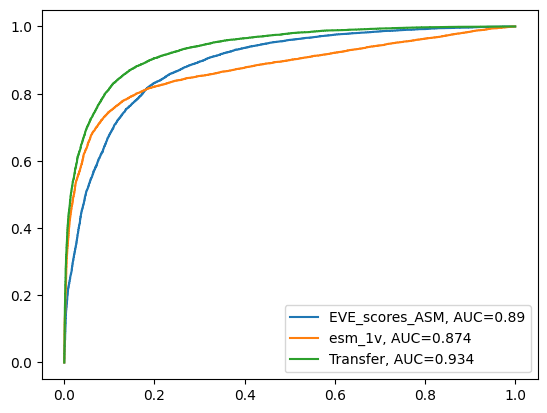

In [22]:
# Figure: analyze ROC curve
spec_at_sens = {}
sens_at_spec = {}
for m in ['EVE_scores_ASM', 'esm_1v', 'Transfer']:
    fpr, tpr, _ = roc_curve(y, pred[m])
    spec_at_sens[m] = {}
    sens_at_spec[m] = {}
    for sens in [0.9, 0.95, 0.99]:
        spec_at_sens[m]['spec at sens '+str(sens)] = 1 - min(fpr[tpr > sens])
    for spec in [0.9, 0.95, 0.99]:
        sens_at_spec[m]['sens at spec '+str(spec)] = max(tpr[fpr < (1 - spec)])
    auc = round(roc_auc_score(y, pred[m]), 3)
    plt.plot(fpr,tpr,label = m + ", " + "AUC=" + str(auc))
plt.legend()
plt.show()

In [23]:
# Table: specificity at high sensitivity
pd.DataFrame(spec_at_sens)

,EVE_scores_ASM,esm_1v,Transfer
spec at sens 0.9,0.689396,0.498661,0.809410
spec at sens 0.95,0.548100,0.273181,0.674701
spec at sens 0.99,0.237640,0.070214,0.371625


In [24]:
# Table: sensitivity at high specificity
pd.DataFrame(sens_at_spec)

,EVE_scores_ASM,esm_1v,Transfer
sens at spec 0.9,0.677369,0.746809,0.816054
sens at spec 0.95,0.512282,0.639942,0.698066
sens at spec 0.99,0.229787,0.392360,0.446325


#### High quality ClinVar set and benchmark against REVEL

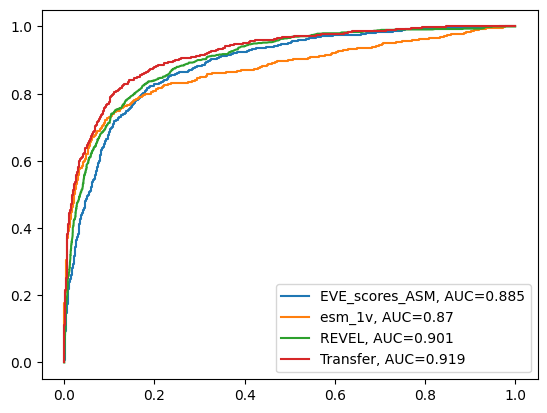

In [25]:
spec_at_sens = {}
sens_at_spec = {}
for m in ['EVE_scores_ASM', 'esm_1v', 'REVEL', 'Transfer']:
    fpr, tpr, _ = roc_curve(hq_y, pred_hq[m])
    spec_at_sens[m] = {}
    sens_at_spec[m] = {}
    for sens in [0.9, 0.95, 0.99]:
        spec_at_sens[m]['spec at sens '+str(sens)] = 1 - min(fpr[tpr > sens])
    for spec in [0.9, 0.95, 0.99]:
        sens_at_spec[m]['sens at spec '+str(spec)] = max(tpr[fpr < (1 - spec)])
    auc = round(roc_auc_score(hq_y, pred_hq[m]), 3)
    plt.plot(fpr,tpr,label = m + ", " + "AUC=" + str(auc))
plt.legend()
plt.show()

In [26]:
# Table: specificity at high sensitivity
pd.DataFrame(spec_at_sens)

,EVE_scores_ASM,esm_1v,REVEL,Transfer
spec at sens 0.9,0.675329,0.501519,0.704354,0.746878
spec at sens 0.95,0.502531,0.269997,0.569693,0.592980
spec at sens 0.99,0.243672,0.080661,0.264934,0.263584


In [27]:
# Table: sensitivity at high specificity
pd.DataFrame(sens_at_spec)

,EVE_scores_ASM,esm_1v,REVEL,Transfer
sens at spec 0.9,0.683944,0.729456,0.713021,0.774968
sens at spec 0.95,0.489254,0.620733,0.589128,0.643489
sens at spec 0.99,0.230088,0.396966,0.257901,0.415929


### Number of training genes vs performance

In [28]:
# Get the prediction matrix
pred_ntrain = pd.DataFrame(index = y.index)
features = feat_selected_dms
cpt = CPTClassifier()

pset_genes = powerset(all_genes)
for genes in pset_genes - {()}:
    genes = list(genes)
    n_genes = len(genes)
    # Transfer model predictions trained on each individual gene
    cpt.train(feat_mat, label, genes, features)
    pred_clinvar = cpt.predict(x[features])
    pred_ntrain['Transfer_' + str(n_genes) + '_' + '+'.join(genes)] = 1 - pred_clinvar.values

# Compare with EVE and ESM-1v
pred_ntrain['_EVE'] = x['EVE_scores_ASM']
pred_ntrain['_ESM-1v'] = -x['esm_1v']
    
# Get per gene AUROC
roc_by_gene_ntrain = get_per_gene_auroc(y, pred_ntrain)

# Add global AUROC
roc_by_gene_ntrain.insert(loc = 0, column = 'Global_AUROC', 
                   value = [np.nan, np.nan, np.nan] + \
                           [float(roc_auc_score(y, pred_ntrain[feat])) for feat in pred_ntrain.columns])
roc_by_gene_ntrain = roc_by_gene_ntrain.sort_values('Global_AUROC', ascending = False).round(4)


274 genes used to calculate per gene AUROC out of 1298 genes
Calculating...


100%|██████████| 274/274 [00:08<00:00, 30.64it/s]


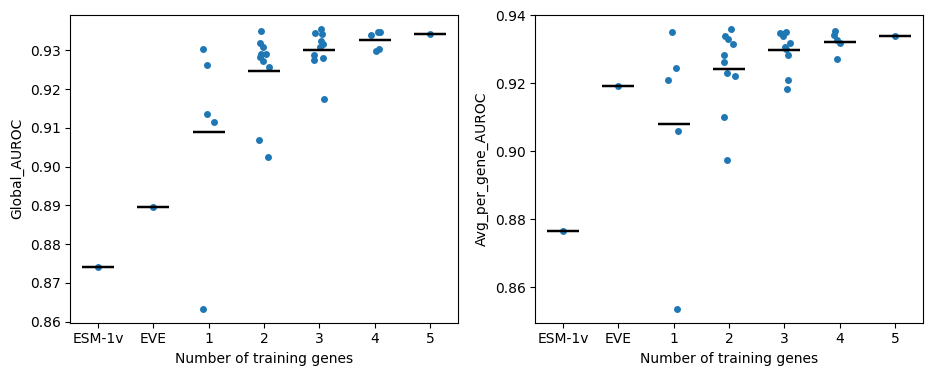

In [29]:
# Figure: Performance with different numbers of training genes
df_ntrain = roc_by_gene_ntrain.iloc[:-3, :2]
df_ntrain['Number of training genes'] = df_ntrain.index.to_series().str.split('_', expand = True)[1]
df_ntrain['Number of training genes'] = pd.Categorical(df_ntrain['Number of training genes'], 
                                                       ['ESM-1v', 'EVE', '1', '2', '3', '4', '5'])
df_ntrain = df_ntrain.sort_values('Number of training genes')
df_ntrain_mean = df_ntrain.groupby('Number of training genes').mean().reset_index()
order = df_ntrain_mean['Number of training genes']

fig, axes = plt.subplots(1, 2, figsize=(11, 4))
sns.scatterplot(ax = axes[0], x = "Number of training genes", y = "Global_AUROC", data = df_ntrain_mean, marker = '_', s = 500, color = 'k')
sns.stripplot(ax = axes[0], x = "Number of training genes", y = "Global_AUROC", data = df_ntrain, order = order, zorder = 0)
sns.scatterplot(ax = axes[1], x = "Number of training genes", y = "Avg_per_gene_AUROC", data = df_ntrain_mean, marker = '_', s = 500, color = 'k')
sns.stripplot(ax = axes[1], x = "Number of training genes", y = "Avg_per_gene_AUROC", data = df_ntrain, order = order, zorder = 0)
plt.show()

#### Add more proteins from ProteinGym

In [30]:
extra_genes = ['KCNH2', 'SCN5A', 'SC6A4', 'RASH', 'SYUA', 'PTEN', 
               'VKOR1', 'A4', 'P53', 'MSH2', 'TPOR', 'BRCA1', 'YAP1']

for gene in extra_genes:
    feat_mat[gene] = pd.read_csv(f'./data/additional_dms/feat_mat_{gene}.csv', index_col = 0)
    label[gene] = pd.read_csv(f'./data/additional_dms/label_{gene}.csv', index_col = 0)
    feat_mat[gene] = feat_mat[gene].loc[label[gene].index]

In [31]:
# We experimented on adding more genes from proteinGym. 
max_subsets = 30

# Function to check if a subset contains the standard 5 training genes
def is_subset(subset, test_set):
    return all(item in test_set for item in subset)

extra_gene_subsets = []

np.random.seed(0)
for i in range(1, len(all_genes + extra_genes) + 1):
    all_combinations = list(itertools.combinations(all_genes + extra_genes, i))
    subset_combinations = [comb for comb in all_combinations if is_subset(comb, all_genes)]
    
    remaining_combinations = [comb for comb in all_combinations if comb not in subset_combinations]

    np.random.seed(0)
    sampled_combinations = random.sample(remaining_combinations, 
                                         min(max_subsets - len(subset_combinations), len(remaining_combinations)))
    
    # Combine sub_a_combinations and sampled_combinations
    extra_gene_subsets.append(sampled_combinations)


In [32]:
# Get the prediction matrix
pred_ntrain_extra = pd.DataFrame(index = y.index)
features = feat_selected_dms
cpt = CPTClassifier()

for n_genes, subsets in enumerate(tqdm(extra_gene_subsets, desc = 'Number of genes', leave = True)):
    n_genes += 1
    for genes in tqdm(subsets, desc = 'Subsets', leave = False):
        genes = list(genes)
        # Transfer model predictions trained on each individual gene
        cpt.train(feat_mat, label, genes, features)
        pred_clinvar = cpt.predict(x[features])
        pred_ntrain_extra['Transfer_' + str(n_genes) + '_' + '+'.join(genes)] = 1 - pred_clinvar.values

# Get per gene AUROC
roc_by_gene_ntrain_extra = get_per_gene_auroc(y, pred_ntrain_extra)

# Add global AUROC
roc_by_gene_ntrain_extra.insert(loc = 0, column = 'Global_AUROC', 
                                value = [np.nan, np.nan, np.nan] + \
                                [float(roc_auc_score(y, pred_ntrain_extra[feat])) for feat in pred_ntrain_extra.columns])
roc_by_gene_ntrain_extra = roc_by_gene_ntrain_extra.sort_values('Global_AUROC', ascending = False).round(4)

Number of genes: 100%|██████████| 18/18 [03:32<00:00, 11.81s/it]


274 genes used to calculate per gene AUROC out of 1298 genes
Calculating...


100%|██████████| 274/274 [02:04<00:00,  2.20it/s]


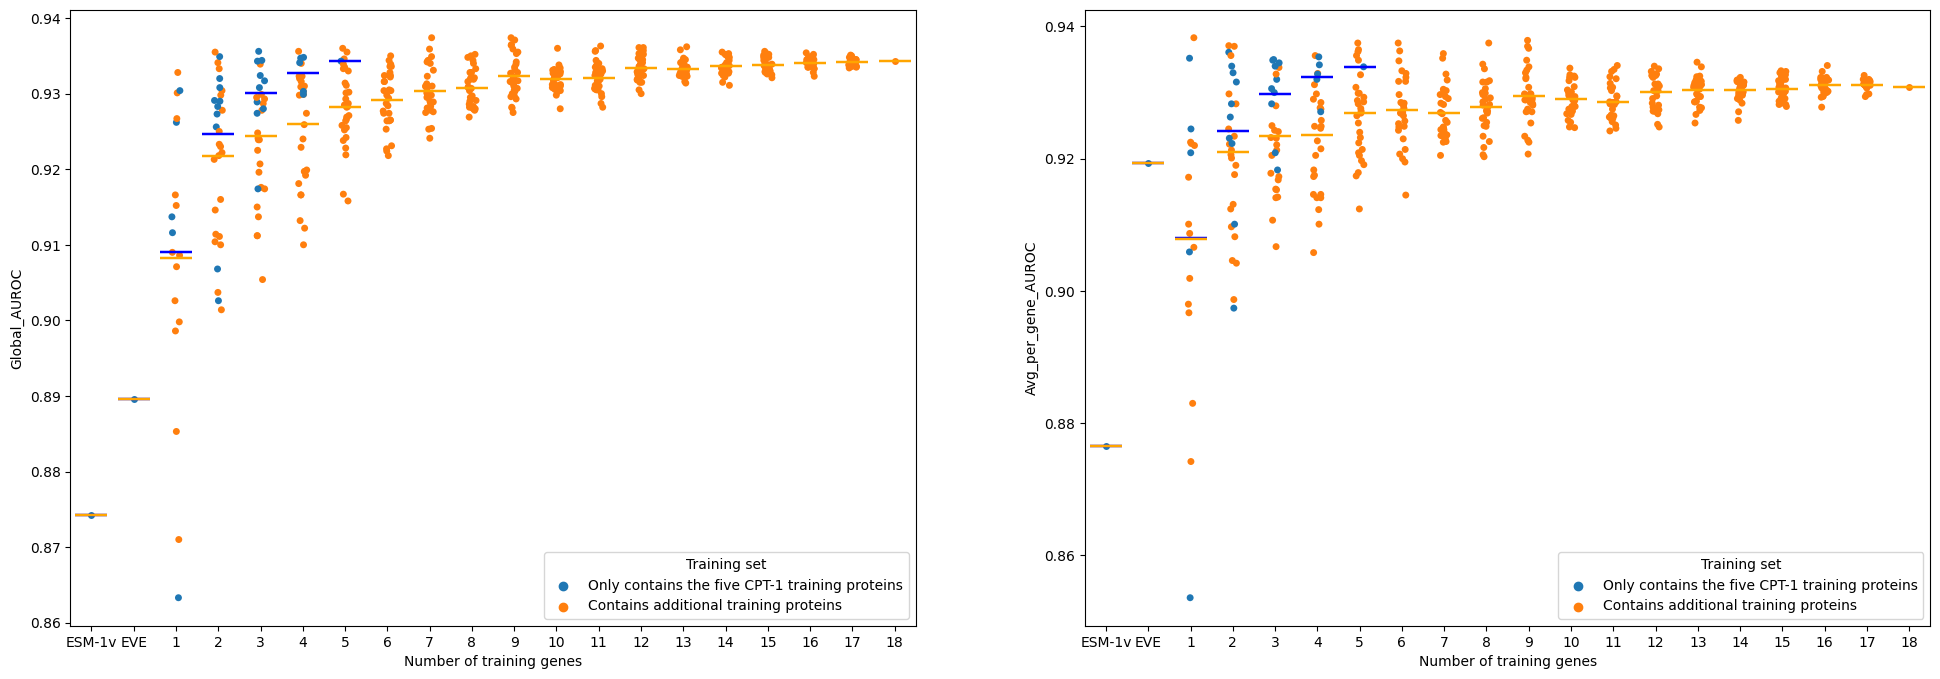

In [33]:
# Figure: Performance with different numbers of training genes
df_ntrain_extra = roc_by_gene_ntrain_extra.iloc[:-3, :2]
df_ntrain_extra['Number of training genes'] = df_ntrain_extra.index.to_series().str.split('_', expand = True)[1]

df_ntrain['Training set'] = 'Only contains the five CPT-1 training proteins'
df_ntrain_extra['Training set'] = 'Contains additional training proteins'
df_ntrain_extra = pd.concat([df_ntrain_extra, df_ntrain])
df_ntrain_extra['Number of training genes'] = pd.Categorical(df_ntrain_extra['Number of training genes'], 
                                                             ['ESM-1v', 'EVE'] + [str(i+1) for i in range(18)])
                                                             
df_ntrain_extra = df_ntrain_extra.sort_values('Number of training genes')
df_ntrain_mean_extra = df_ntrain_extra.groupby('Number of training genes').mean().reset_index()
order = df_ntrain_mean_extra['Number of training genes']

fig, axes = plt.subplots(1, 2, figsize=(24, 8))
sns.scatterplot(ax = axes[0], x = "Number of training genes", y = "Global_AUROC", data = df_ntrain_mean, marker = '_', s = 500, 
                color = 'blue')
sns.scatterplot(ax = axes[0], x = "Number of training genes", y = "Global_AUROC", data = df_ntrain_mean_extra, marker = '_', s = 500, 
                color = 'orange')
sns.stripplot(ax = axes[0], x = "Number of training genes", y = "Global_AUROC", data = df_ntrain_extra, order = order, zorder = 0, 
              hue = 'Training set')
sns.scatterplot(ax = axes[1], x = "Number of training genes", y = "Avg_per_gene_AUROC", data = df_ntrain_mean, marker = '_', s = 500, 
                color = 'blue')
sns.scatterplot(ax = axes[1], x = "Number of training genes", y = "Avg_per_gene_AUROC", data = df_ntrain_mean_extra, marker = '_', s = 500, 
                color = 'orange')
sns.stripplot(ax = axes[1], x = "Number of training genes", y = "Avg_per_gene_AUROC", data = df_ntrain_extra, order = order, zorder = 0,
              hue = 'Training set')
plt.show()

#### Add more proteins from ProteinGym (alternative plot)

In [34]:
extra_gene_subsets = []

np.random.seed(0)
for i in range(1, len(extra_genes) + 1):
    all_combinations = list(itertools.combinations(extra_genes, i))
    subset_combinations = []
    
    remaining_combinations = [comb for comb in all_combinations if comb not in subset_combinations]

    np.random.seed(0)
    sampled_combinations = random.sample(remaining_combinations, 
                                         min(max_subsets - len(subset_combinations), len(remaining_combinations)))
    
    # Combine sub_a_combinations and sampled_combinations
    extra_gene_subsets.append(sampled_combinations)

In [35]:
# Get the prediction matrix
pred_ntrain_extra = pd.DataFrame(index = y.index)
features = feat_selected_dms
cpt = CPTClassifier()

for n_genes, subsets in enumerate(tqdm(extra_gene_subsets, desc = 'Number of genes', leave = True)):
    n_genes += 1
    for genes in tqdm(subsets, desc = 'Subsets', leave = False):
        genes = list(genes)
        # Transfer model predictions trained on each individual gene
        cpt.train(feat_mat, label, genes, features)
        pred_clinvar = cpt.predict(x[features])
        pred_ntrain_extra['Transfer_' + str(n_genes) + '_' + '+'.join(genes)] = 1 - pred_clinvar.values

# Get per gene AUROC
roc_by_gene_ntrain_extra = get_per_gene_auroc(y, pred_ntrain_extra)

# Add global AUROC
roc_by_gene_ntrain_extra.insert(loc = 0, column = 'Global_AUROC', 
                                value = [np.nan, np.nan, np.nan] + \
                                [float(roc_auc_score(y, pred_ntrain_extra[feat])) for feat in pred_ntrain_extra.columns])
roc_by_gene_ntrain_extra = roc_by_gene_ntrain_extra.sort_values('Global_AUROC', ascending = False).round(4)

Number of genes: 100%|██████████| 13/13 [01:58<00:00,  9.15s/it]


274 genes used to calculate per gene AUROC out of 1298 genes
Calculating...


100%|██████████| 274/274 [01:25<00:00,  3.20it/s]


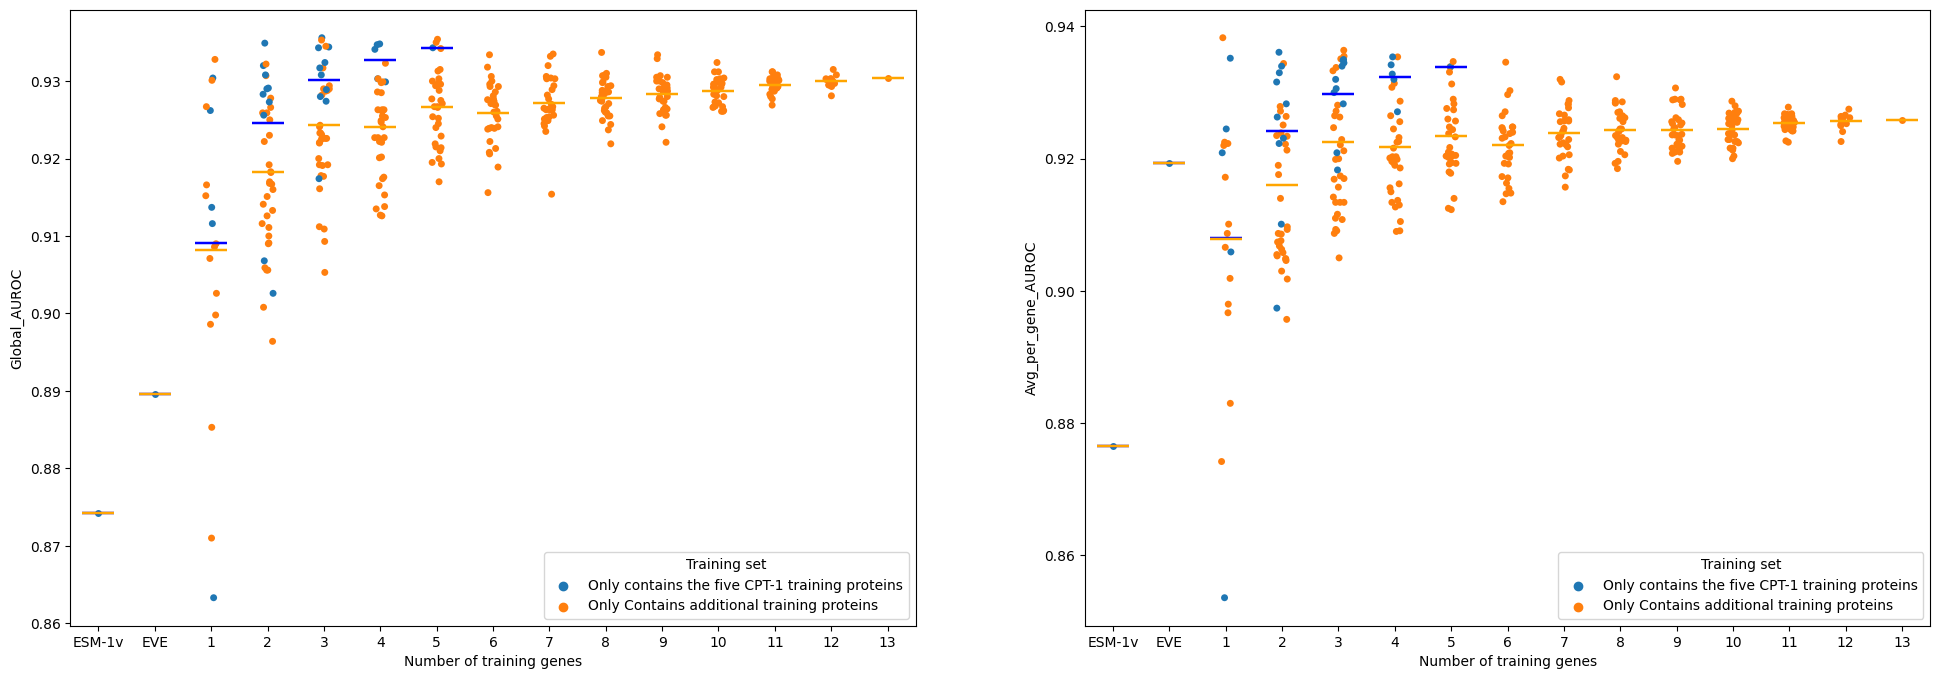

In [36]:
# Figure: Performance with different numbers of training genes
df_ntrain_extra = roc_by_gene_ntrain_extra.iloc[:-3, :2]
df_ntrain_extra['Number of training genes'] = df_ntrain_extra.index.to_series().str.split('_', expand = True)[1]

df_ntrain['Training set'] = 'Only contains the five CPT-1 training proteins'
df_ntrain_extra['Training set'] = 'Only Contains additional training proteins'
df_ntrain_extra = pd.concat([df_ntrain_extra, df_ntrain])
df_ntrain_extra['Number of training genes'] = pd.Categorical(df_ntrain_extra['Number of training genes'], 
                                                             ['ESM-1v', 'EVE'] + [str(i+1) for i in range(13)])
                                                             
df_ntrain_extra = df_ntrain_extra.sort_values('Number of training genes')
df_ntrain_mean_extra = df_ntrain_extra.groupby('Number of training genes').mean().reset_index()
order = df_ntrain_mean_extra['Number of training genes']

fig, axes = plt.subplots(1, 2, figsize=(24, 8))
sns.scatterplot(ax = axes[0], x = "Number of training genes", y = "Global_AUROC", data = df_ntrain_mean, marker = '_', s = 500, 
                color = 'blue')
sns.scatterplot(ax = axes[0], x = "Number of training genes", y = "Global_AUROC", data = df_ntrain_mean_extra, marker = '_', s = 500, 
                color = 'orange')
sns.stripplot(ax = axes[0], x = "Number of training genes", y = "Global_AUROC", data = df_ntrain_extra, order = order, zorder = 0, 
              hue = 'Training set')
sns.scatterplot(ax = axes[1], x = "Number of training genes", y = "Avg_per_gene_AUROC", data = df_ntrain_mean, marker = '_', s = 500, 
                color = 'blue')
sns.scatterplot(ax = axes[1], x = "Number of training genes", y = "Avg_per_gene_AUROC", data = df_ntrain_mean_extra, marker = '_', s = 500, 
                color = 'orange')
sns.stripplot(ax = axes[1], x = "Number of training genes", y = "Avg_per_gene_AUROC", data = df_ntrain_extra, order = order, zorder = 0,
              hue = 'Training set')
plt.show()

### Test within-gene imputation

In [37]:
# Select mutations where EVE scores are not available
print(f"Fraction of variants without EVE scores: {x['eve_na'].mean()}")
y_eve_na = y[x['eve_na'] == True]
x_eve_na = x[x['eve_na'] == True]

Fraction of variants without EVE scores: 0.1466363071827779


In [38]:
# Reselect features without EVE
feat_selected_dms_no_eve = select_feat_by_category(feat_mat, label, all_genes, base_feat = ['esm_1v'], with_struct = True)

Selecting features in the category 100verte_msa


100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


Best features: ('100verte_mut_freq',) Avg metric on DMS: 0.78211
Selecting features in the category 30mammal_msa


100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


Best features: ('30mammal_mut_freq',) Avg metric on DMS: 0.7812
Selecting features in the category mpnn


100%|██████████| 7/7 [00:04<00:00,  1.47it/s]


Best features: ('vanilla_protmpnn_norm',) Avg metric on DMS: 0.78523
Selecting features in the category struct


100%|██████████| 3/3 [00:02<00:00,  1.33it/s]


Best features: ('conditioned_mt_score',) Avg metric on DMS: 0.78552
0 ['BLOSUM1'] 0.78851
1 ['BLOSUM1', 'ST6'] 0.79029
All selected features: ['esm_1v', '100verte_mut_freq', '30mammal_mut_freq', 'vanilla_protmpnn_norm', 'conditioned_mt_score', 'BLOSUM1', 'ST6']


In [39]:
# Construct prediction matrix
pred_eve_na = pd.DataFrame(index = y_eve_na.index)

cpt = CPTClassifier()
# Transfer model predictions
features = feat_selected_dms
print('Features selected on DMS', features)
cpt.train(feat_mat, label, all_genes, features)
pred_clinvar = cpt.predict(x_eve_na[features])
pred_eve_na['Transfer'] = 1 - pred_clinvar.values

# Transfer model without EVE
features = feat_selected_dms_no_eve
print('Features w/o eve', features)
cpt.train(feat_mat, label, all_genes, features)
pred_clinvar = cpt.predict(x_eve_na[features])
pred_eve_na['Transfer_no_eve'] = 1 - pred_clinvar.values

# Transfer model without EVE without structural features
features = list(set(feat_selected_dms_no_eve) - set(struct_feats + mpnn_feats))
print('Features w/o eve w/o mpnn', features)
cpt.train(feat_mat, label, all_genes, features)
pred_clinvar = cpt.predict(x_eve_na[features])
pred_eve_na['Transfer_no_eve_struct'] = 1 - pred_clinvar.values

# Transfer model predictions without MSA features
features = list(set(feat_selected_dms) - set(msa_feats))
print('Features w/o msa', features)
cpt.train(feat_mat, label, all_genes, features)
pred_clinvar = cpt.predict(x_eve_na[features])
pred_eve_na['Transfer_no_msa'] = 1 - pred_clinvar.values

# Transfer model predictions without structural features
features = list(set(feat_selected_dms) - set(struct_feats + mpnn_feats))
print('Features w/o struct', features)
cpt.train(feat_mat, label, all_genes, features)
pred_clinvar = cpt.predict(x_eve_na[features])
pred_eve_na['Transfer_no_struct'] = 1 - pred_clinvar.values

# Individual features
for feat in list(set(pos_feats) - set(aa_feats)):
    pred_eve_na[feat] = x_eve_na[feat]
for feat in list(set(neg_feats) - set(aa_feats)):
    pred_eve_na[feat] = -x_eve_na[feat]

feat_list = pos_feats + neg_feats

Features selected on DMS ['esm_1v', 'evolutionary_index_ASM', '100verte_mut_freq', '30mammal_mut_freq', 'vanilla_protmpnn_norm', 'conditioned_wt_score', 'BLOSUM1', 'ST6', 'VHSE6']
Features w/o eve ['esm_1v', '100verte_mut_freq', '30mammal_mut_freq', 'vanilla_protmpnn_norm', 'conditioned_mt_score', 'BLOSUM1', 'ST6']
Features w/o eve w/o mpnn ['BLOSUM1', 'ST6', '100verte_mut_freq', 'esm_1v', '30mammal_mut_freq']
Features w/o msa ['BLOSUM1', 'ST6', 'conditioned_wt_score', 'vanilla_protmpnn_norm', 'esm_1v', 'evolutionary_index_ASM', 'VHSE6']
Features w/o struct ['BLOSUM1', 'ST6', '100verte_mut_freq', 'esm_1v', '30mammal_mut_freq', 'evolutionary_index_ASM', 'VHSE6']


In [40]:
# Get AUROC matrix
# Get per gene AUROC
roc_by_gene_eve_na = get_per_gene_auroc(y_eve_na, pred_eve_na)

# Add global AUROC
roc_by_gene_eve_na.insert(loc = 0, column = 'Global_AUROC', 
                   value = [np.nan, np.nan, np.nan] + \
                           [float(roc_auc_score(y_eve_na, pred_eve_na[feat])) for feat in pred_eve_na.columns])
roc_by_gene_eve_na = roc_by_gene_eve_na.sort_values('Global_AUROC', ascending = False).round(4)

# Transpose the dataframe
roc_by_gene_eve_na = roc_by_gene_eve_na.transpose()
roc_by_gene_eve_na.iloc[:2, :]

17 genes used to calculate per gene AUROC out of 828 genes
Calculating...


100%|██████████| 17/17 [00:00<00:00, 34.17it/s]


,Transfer,Transfer_no_struct,Transfer_no_msa,Transfer_no_eve,Transfer_no_eve_struct,esm_1v,EVE_scores_ASM,evolutionary_index_ASM,100verte_wt_freq,100verte_mut_freq,...,conditioned_wt_score,ca_only_protmpnn_norm,ca_protmpnn_norm,vanilla_protmpnn_norm,30mammal_mut_freq,30mammal_gap_freq,100verte_gap_freq,n,n_pos,n_neg
Global_AUROC,0.9215,0.9169,0.9111,0.9096,0.8919,0.8650,0.8517,0.8497,0.8242,0.7314,...,0.6663,0.6525,0.6307,0.6260,0.6239,0.5073,0.4757,NaN,NaN,NaN
Avg_per_gene_AUROC,0.9216,0.9160,0.9139,0.9033,0.8889,0.8487,0.9016,0.8995,0.8001,0.7252,...,0.7446,0.6632,0.6177,0.6293,0.6056,0.5685,0.4544,26.0,15.4118,10.5882


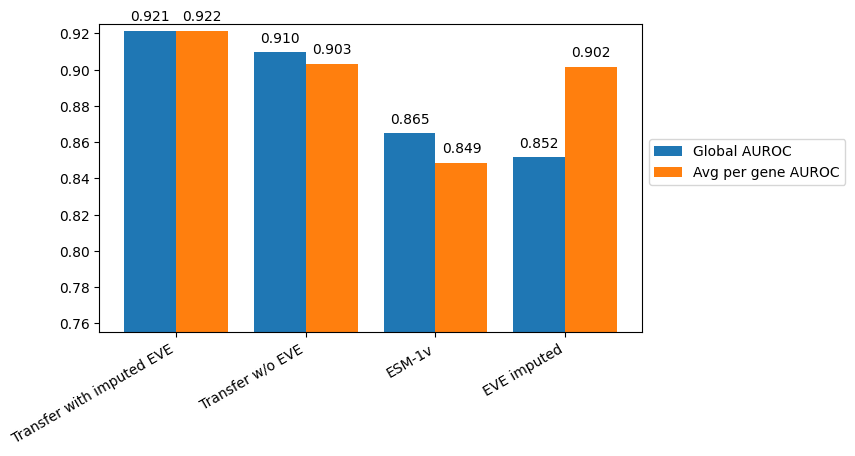

In [41]:
# Figure: within-gene imputation of EVE scores improves performance
auroc_g_na = roc_by_gene_eve_na.loc['Global_AUROC', 
                                    ['Transfer', 'Transfer_no_eve', 'esm_1v', 'EVE_scores_ASM']].to_list()
auroc_p_na = roc_by_gene_eve_na.loc['Avg_per_gene_AUROC', 
                                    ['Transfer', 'Transfer_no_eve', 'esm_1v', 'EVE_scores_ASM']].to_list()
bars_na = ['Transfer with imputed EVE', 'Transfer w/o EVE', 'ESM-1v', 'EVE imputed']
x_pos_na = np.arange(len(bars_na))
width = 0.4

fig, ax = plt.subplots(figsize=(7, 4))
rects_g_na = ax.bar(x_pos_na - width/2, auroc_g_na, width, label = 'Global AUROC')
rects_p_na = ax.bar(x_pos_na + width/2, auroc_p_na, width, label = 'Avg per gene AUROC')

ax.bar_label(rects_g_na, labels=[f'{x:,.3f}' for x in rects_g_na.datavalues], padding = 5)
ax.bar_label(rects_p_na, labels=[f'{x:,.3f}' for x in rects_p_na.datavalues], padding = 5)

ax.set_xticks(x_pos_na)
ax.set_xticklabels(bars_na, rotation = 30, ha="right")

ax.set_ylim(0.755, 0.925)

plt.legend(bbox_to_anchor=(1, 0.65))
plt.xlabel('')
plt.show()

### Test cross-gene imputation

In [42]:
# Reselect features without all EVE-related features (EVE and conditioned scores)
feat_selected_dms_no_eve_related = select_feat_by_category(feat_mat, label, all_genes, 
                                                           base_feat = ['esm_1v'], with_struct = False)

Selecting features in the category 100verte_msa


100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


Best features: ('100verte_mut_freq',) Avg metric on DMS: 0.78211
Selecting features in the category 30mammal_msa


100%|██████████| 7/7 [00:04<00:00,  1.41it/s]


Best features: ('30mammal_mut_freq',) Avg metric on DMS: 0.7812
Selecting features in the category mpnn


100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


Best features: ('vanilla_protmpnn_norm',) Avg metric on DMS: 0.78523
0 ['BLOSUM1'] 0.78816
1 ['BLOSUM1', 'ST6'] 0.79002
2 ['BLOSUM1', 'ST6', 'VHSE1'] 0.79086
All selected features: ['esm_1v', '100verte_mut_freq', '30mammal_mut_freq', 'vanilla_protmpnn_norm', 'BLOSUM1', 'ST6', 'VHSE1']


In [43]:
# Reselect features without all EVE-related features (EVE and conditioned scores)
feat_selected_dms_eve_xgi = select_feat_by_category(feat_mat_xgi, label_xgi, all_genes)

Selecting features in the category 100verte_msa


100%|██████████| 7/7 [00:03<00:00,  1.82it/s]


Best features: ('100verte_mut_freq',) Avg metric on DMS: 0.7832
Selecting features in the category 30mammal_msa


100%|██████████| 7/7 [00:04<00:00,  1.61it/s]


Best features: ('30mammal_mut_freq',) Avg metric on DMS: 0.78305
Selecting features in the category mpnn


100%|██████████| 7/7 [00:04<00:00,  1.52it/s]


Best features: ('vanilla_protmpnn_norm',) Avg metric on DMS: 0.78537
Selecting features in the category struct


100%|██████████| 3/3 [00:02<00:00,  1.39it/s]


Best features: ('conditioned_wt_score',) Avg metric on DMS: 0.78555
0 ['BLOSUM1'] 0.78792
1 ['BLOSUM1', 'ST6'] 0.78955
All selected features: ['esm_1v', 'evolutionary_index_ASM', '100verte_mut_freq', '30mammal_mut_freq', 'vanilla_protmpnn_norm', 'conditioned_wt_score', 'BLOSUM1', 'ST6']


In [44]:
# Load weighted KNN imputers fitted on the 5 DMS genes
imputer = pd.read_pickle('./data/imputer_5dms.pkl')

In [45]:
# Calculate imputed values for mutations without EVE scores
x_impute = []
print('Imputing with weights fitted on DMS genes...')
for gene in tqdm(all_genes):
    x_eve_na[eve_feats] = np.nan
    x_eve_na[struct_feats] = np.nan
    for feat in eve_feats + struct_feats:
        x_eve_na = imputer.loc[feat, gene].transform(x_eve_na)
    x_impute.append(x_eve_na.copy())
x_eve_na = sum(x_impute) / len(all_genes)

Imputing with weights fitted on DMS genes...


100%|██████████| 5/5 [00:43<00:00,  8.64s/it]


In [46]:
# Construct prediction matrix
pred_eve_na = pd.DataFrame(index = y_eve_na.index)

cpt = CPTClassifier()
# Transfer model predictions
features = feat_selected_dms
print('Features selected on DMS', features)
cpt.train(feat_mat, label, all_genes, features)
pred_clinvar = cpt.predict(x_eve_na[features])
pred_eve_na['Transfer'] = 1 - pred_clinvar.values

# Transfer model predictions
cpt.train(feat_mat_xgi, label_xgi, all_genes, feat_selected_dms)
pred_clinvar = cpt.predict(x_eve_na[feat_selected_dms])
pred_eve_na['Transfer_xgi_model'] = 1 - pred_clinvar.values

# Transfer model without EVE-related features
features = feat_selected_dms_no_eve_related
print('Features w/o eve', features)
cpt.train(feat_mat, label, all_genes, features)
pred_clinvar = cpt.predict(x_eve_na[features])
pred_eve_na['Transfer_no_eve_related'] = 1 - pred_clinvar.values

# Individual features
for feat in list(set(pos_feats) - set(aa_feats)):
    pred_eve_na[feat] = x_eve_na[feat]
for feat in list(set(neg_feats) - set(aa_feats)):
    pred_eve_na[feat] = -x_eve_na[feat]

feat_list = pos_feats + neg_feats

# Get per gene AUROC
roc_by_gene_eve_na = get_per_gene_auroc(y_eve_na, pred_eve_na)

# Add global AUROC
roc_by_gene_eve_na.insert(loc = 0, column = 'Global_AUROC', 
                          value = [np.nan, np.nan, np.nan] + \
                                   [float(roc_auc_score(y_eve_na, pred_eve_na[feat])) for feat in pred_eve_na.columns])
roc_by_gene_eve_na = roc_by_gene_eve_na.sort_values('Global_AUROC', ascending = False).round(4)

# Transpose the dataframe
roc_by_gene_eve_na = roc_by_gene_eve_na.transpose()
roc_by_gene_eve_na.iloc[:2, :]

Features selected on DMS ['esm_1v', 'evolutionary_index_ASM', '100verte_mut_freq', '30mammal_mut_freq', 'vanilla_protmpnn_norm', 'conditioned_wt_score', 'BLOSUM1', 'ST6', 'VHSE6']
Features w/o eve ['esm_1v', '100verte_mut_freq', '30mammal_mut_freq', 'vanilla_protmpnn_norm', 'BLOSUM1', 'ST6', 'VHSE1']
17 genes used to calculate per gene AUROC out of 828 genes
Calculating...


100%|██████████| 17/17 [00:00<00:00, 59.02it/s]


,Transfer,Transfer_xgi_model,Transfer_no_eve_related,EVE_scores_ASM,evolutionary_index_ASM,conditioned_mt_score,conditioned_wt_score,esm_1v,100verte_wt_freq,100verte_mut_freq,30mammal_wt_freq,ca_only_protmpnn_norm,ca_protmpnn_norm,vanilla_protmpnn_norm,30mammal_mut_freq,30mammal_gap_freq,100verte_gap_freq,n,n_pos,n_neg
Global_AUROC,0.9109,0.9093,0.9046,0.9008,0.9002,0.8907,0.8855,0.8650,0.8242,0.7314,0.7168,0.6525,0.6307,0.6260,0.6239,0.5073,0.4757,NaN,NaN,NaN
Avg_per_gene_AUROC,0.8958,0.8932,0.8842,0.8932,0.8935,0.8745,0.8442,0.8487,0.8001,0.7252,0.6755,0.6632,0.6177,0.6293,0.6056,0.5685,0.4544,26.0,15.4118,10.5882


In [47]:
# Mutations with EVE scores
y_eve_av = y[x['eve_na'] == False]
x_eve_av = x[x['eve_na'] == False]
print(f"Fraction of variants without EVE scores: {(~x['eve_na']).mean()}")

Fraction of variants without EVE scores: 0.8533636928172221


In [48]:
# Construct prediction matrix
pred_eve_av = pd.DataFrame(index = y_eve_av.index)

cpt = CPTClassifier()
# Transfer model predictions
features = feat_selected_dms
print('Features selected on DMS', features)
cpt.train(feat_mat, label, all_genes, features)
pred_clinvar = cpt.predict(x_eve_av[features])
pred_eve_av['Transfer'] = 1 - pred_clinvar.values

pred_eve_av['EVE'] = x_eve_av['EVE_scores_ASM']

Features selected on DMS ['esm_1v', 'evolutionary_index_ASM', '100verte_mut_freq', '30mammal_mut_freq', 'vanilla_protmpnn_norm', 'conditioned_wt_score', 'BLOSUM1', 'ST6', 'VHSE6']


In [49]:
# Calculate imputed values for mutations with EVE scores
# ! This step is relatively slow and takes ~10min on a laptop
x_impute = []
print('Imputing with weights fitted on DMS genes...')
for gene in tqdm(all_genes):
    x_eve_av[eve_feats] = np.nan
    x_eve_av[struct_feats] = np.nan
    for feat in eve_feats + struct_feats:
        x_eve_av = imputer.loc[feat, gene].transform(x_eve_av)
    x_impute.append(x_eve_av.copy())
x_eve_av = sum(x_impute) / len(all_genes)

Imputing with weights fitted on DMS genes...


100%|██████████| 5/5 [04:29<00:00, 53.85s/it]


In [50]:
# Transfer model with imputed eve related features
features = feat_selected_dms
cpt.train(feat_mat, label, all_genes, features)
pred_clinvar = cpt.predict(x_eve_av[features])
pred_eve_av['Transfer_eve_imputed'] = 1 - pred_clinvar.values

cpt.train(feat_mat_xgi, label_xgi, all_genes, feat_selected_dms)
pred_clinvar = cpt.predict(x_eve_av[feat_selected_dms])
pred_eve_av['Transfer_eve_imputed_xgi_model'] = 1 - pred_clinvar.values

# Transfer model without eve related features
features = feat_selected_dms_no_eve_related
cpt.train(feat_mat, label, all_genes, features)
pred_clinvar = cpt.predict(x_eve_av[features])
pred_eve_av['Transfer_no_eve_related'] = 1 - pred_clinvar.values

pred_eve_av['EVE_imputed'] = x_eve_av['EVE_scores_ASM']
pred_eve_av['ESM-1v'] = -x_eve_av['esm_1v']

In [51]:
# Get AUROC matrix
# Get per gene AUROC
roc_by_gene_eve_av = get_per_gene_auroc(y_eve_av, pred_eve_av)

# Add global AUROC
roc_by_gene_eve_av.insert(loc = 0, column = 'Global_AUROC', 
                          value = [np.nan, np.nan, np.nan] + \
                                  [float(roc_auc_score(y_eve_av, pred_eve_av[feat])) for feat in pred_eve_av.columns])
roc_by_gene_eve_av = roc_by_gene_eve_av.sort_values('Global_AUROC', ascending = False).round(4)

# Transpose the dataframe
roc_by_gene_eve_av = roc_by_gene_eve_av.transpose()

roc_by_gene_eve_av.iloc[:2, :]

230 genes used to calculate per gene AUROC out of 1246 genes
Calculating...


100%|██████████| 230/230 [00:01<00:00, 119.95it/s]


,Transfer,Transfer_eve_imputed_xgi_model,Transfer_eve_imputed,Transfer_no_eve_related,EVE_imputed,EVE,ESM-1v,n,n_pos,n_neg
Global_AUROC,0.9331,0.9218,0.9184,0.9176,0.9094,0.8890,0.8723,NaN,NaN,NaN
Avg_per_gene_AUROC,0.9364,0.9188,0.9176,0.9158,0.9077,0.9223,0.8747,49.613,23.6261,25.987


In [52]:
# Get AUROC matrix
# Get per gene AUROC
roc_by_gene_eve_av = get_per_gene_auroc(y_eve_av, pred_eve_av)

# Add global AUROC
roc_by_gene_eve_av.insert(loc = 0, column = 'Global_AUROC', 
                          value = [np.nan, np.nan, np.nan] + \
                                  [float(roc_auc_score(y_eve_av, pred_eve_av[feat])) for feat in pred_eve_av.columns])
roc_by_gene_eve_av = roc_by_gene_eve_av.sort_values('Global_AUROC', ascending = False).round(4)

# Transpose the dataframe
roc_by_gene_eve_av = roc_by_gene_eve_av.transpose()

roc_by_gene_eve_av.iloc[:2, :]

230 genes used to calculate per gene AUROC out of 1246 genes
Calculating...


100%|██████████| 230/230 [00:01<00:00, 136.55it/s]


,Transfer,Transfer_eve_imputed_xgi_model,Transfer_eve_imputed,Transfer_no_eve_related,EVE_imputed,EVE,ESM-1v,n,n_pos,n_neg
Global_AUROC,0.9331,0.9218,0.9184,0.9176,0.9094,0.8890,0.8723,NaN,NaN,NaN
Avg_per_gene_AUROC,0.9364,0.9188,0.9176,0.9158,0.9077,0.9223,0.8747,49.613,23.6261,25.987


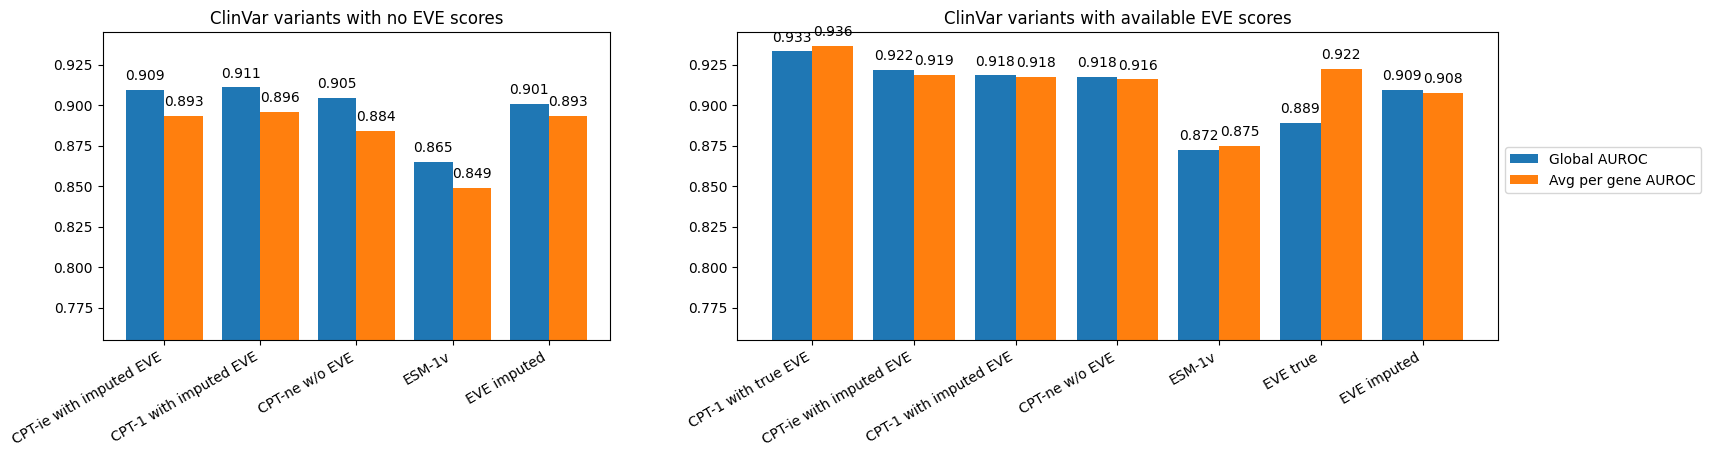

In [53]:
# Figure: Cross-gene imputation of EVE scores improves performance
auroc_g_na = roc_by_gene_eve_na.loc['Global_AUROC', 
                                    ['Transfer_xgi_model', 'Transfer', 'Transfer_no_eve_related', 'esm_1v', 'EVE_scores_ASM']].to_list()
auroc_p_na = roc_by_gene_eve_na.loc['Avg_per_gene_AUROC', 
                                    ['Transfer_xgi_model', 'Transfer', 'Transfer_no_eve_related', 'esm_1v', 'EVE_scores_ASM']].to_list()
auroc_g_av = roc_by_gene_eve_av.loc['Global_AUROC', 
                                    ['Transfer', 'Transfer_eve_imputed_xgi_model', 'Transfer_eve_imputed', 'Transfer_no_eve_related', 'ESM-1v', 'EVE', 'EVE_imputed']].to_list()
auroc_p_av = roc_by_gene_eve_av.loc['Avg_per_gene_AUROC', 
                                    ['Transfer', 'Transfer_eve_imputed_xgi_model', 'Transfer_eve_imputed', 'Transfer_no_eve_related', 'ESM-1v', 'EVE', 'EVE_imputed']].to_list()
bars_na = ['CPT-ie with imputed EVE', 'CPT-1 with imputed EVE', 'CPT-ne w/o EVE', 'ESM-1v', 'EVE imputed']
bars_av = ['CPT-1 with true EVE', 'CPT-ie with imputed EVE', 'CPT-1 with imputed EVE', 'CPT-ne w/o EVE', 'ESM-1v', 'EVE true', 'EVE imputed']
x_pos_na = np.arange(len(bars_na))
x_pos_av = np.arange(len(bars_av))
width = 0.4

fig, axes = plt.subplots(1, 2, figsize=(18, 4), gridspec_kw={'width_ratios': [2, 3]})
rects_g_na = axes[0].bar(x_pos_na - width/2, auroc_g_na, width, label = 'Global AUROC')
rects_p_na = axes[0].bar(x_pos_na + width/2, auroc_p_na, width, label = 'Avg per gene AUROC')
rects_g_av = axes[1].bar(x_pos_av - width/2, auroc_g_av, width, label = 'Global AUROC')
rects_p_av = axes[1].bar(x_pos_av + width/2, auroc_p_av, width, label = 'Avg per gene AUROC')

axes[0].bar_label(rects_g_na, labels=[f'{x:,.3f}' for x in rects_g_na.datavalues], padding = 5)
axes[0].bar_label(rects_p_na, labels=[f'{x:,.3f}' for x in rects_p_na.datavalues], padding = 5)
axes[1].bar_label(rects_g_av, labels=[f'{x:,.3f}' for x in rects_g_av.datavalues], padding = 5)
axes[1].bar_label(rects_p_av, labels=[f'{x:,.3f}' for x in rects_p_av.datavalues], padding = 5)

axes[0].set_xticks(x_pos_na)
axes[0].set_xticklabels(bars_na, rotation = 30, ha="right")
axes[1].set_xticks(x_pos_av)
axes[1].set_xticklabels(bars_av, rotation = 30, ha="right")

axes[0].set_ylim(0.755, 0.945)
axes[1].set_ylim(0.755, 0.945)

axes[0].title.set_text('ClinVar variants with no EVE scores') # 6566
axes[1].title.set_text('ClinVar variants with available EVE scores') # 45751

plt.legend(bbox_to_anchor=(1, 0.65))
plt.xlabel('')
plt.show()

### Baseline performance with no supervision on DMS

In [54]:
# Reload data
feat_mat, label = load_data(all_genes, binarize = True)

Loaded 785 positive variants and 785 negative variants in CALM1
Loaded 1370 positive variants and 1370 negative variants in TPK1
Loaded 4769 positive variants and 4779 negative variants in MTHR
Loaded 720 positive variants and 721 negative variants in SUMO1
Loaded 1088 positive variants and 1089 negative variants in UBC9


In [55]:
# Remove columns that will disrupt quantile normalization
x = x.drop(['100v_na', '30m_na', 'eve_na'], axis = 1)

AUROC by averaging quantile normalized esm-1v and EVE
274 genes used to calculate per gene AUROC out of 1298 genes
Calculating...


100%|██████████| 274/274 [00:00<00:00, 436.81it/s]


AUROC by averaging quantile normalized selected features
274 genes used to calculate per gene AUROC out of 1298 genes
Calculating...


100%|██████████| 274/274 [00:00<00:00, 497.51it/s]


AUROC by fitting transfer model with only esm-1v and EVE
274 genes used to calculate per gene AUROC out of 1298 genes
Calculating...


100%|██████████| 274/274 [00:00<00:00, 572.95it/s]


AUROC by averaging quantile normalized random features


100%|██████████| 100/100 [00:01<00:00, 52.21it/s]


274 genes used to calculate per gene AUROC out of 1298 genes
Calculating...


100%|██████████| 274/274 [00:30<00:00,  8.98it/s]


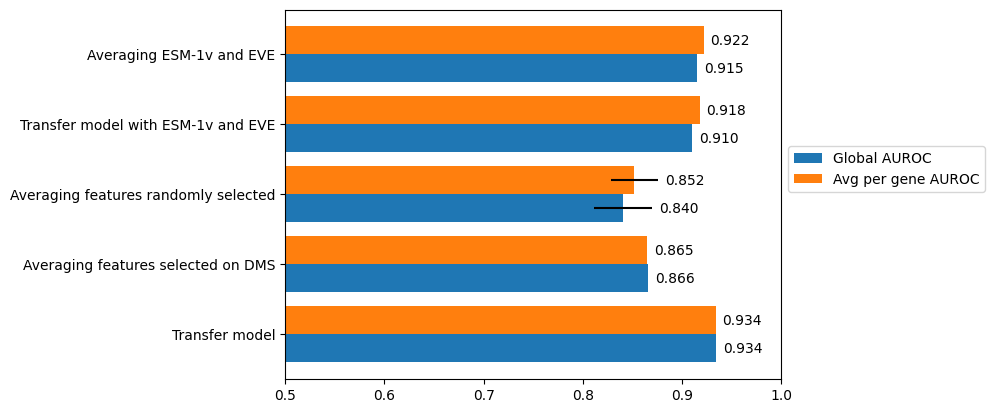

In [56]:
# Figure: baseline performance by averaging quantile normalized features
# Quantile normalize the features
# https://stackoverflow.com/questions/37935920/quantile-normalization-on-pandas-dataframe
rank_mean = x.stack().groupby(x.rank(method='first').stack().astype(int)).mean()
x_qnorm = x.rank(method='min').stack().astype(int).map(rank_mean).unstack()

# Get global and per gene auroc for avg 2 models and avg selected features
pred = pd.DataFrame(index = x.index)
pred['avg_2models'] = (-x_qnorm['esm_1v'] + x_qnorm['EVE_scores_ASM']) / 2
pred['avg_feat_selected'] = (x_qnorm[list(set(feat_selected_dms).intersection(set(pos_feats)))].sum(axis = 1) -
                             x_qnorm[list(set(feat_selected_dms).intersection(set(neg_feats)))].sum(axis = 1)
                            ) / len(feat_selected_dms)
cpt = CPTClassifier()
cpt.train(feat_mat, label, all_genes, ['esm_1v', 'EVE_scores_ASM'])
pred_clinvar = cpt.predict(x[['esm_1v', 'EVE_scores_ASM']])
pred['transfer_2models'] = 1 - pred_clinvar.values

print('AUROC by averaging quantile normalized esm-1v and EVE')
g_auroc_avg_2models = roc_auc_score(y, pred['avg_2models'])
p_auroc_avg_2models = get_per_gene_auroc(y, pred[['avg_2models']]).iloc[-1, 0]

print('AUROC by averaging quantile normalized selected features')
g_auroc_avg_feat_selected = roc_auc_score(y, pred['avg_feat_selected'])
p_auroc_avg_feat_selected = get_per_gene_auroc(y, pred[['avg_feat_selected']]).iloc[-1, 0]

print('AUROC by fitting transfer model with only esm-1v and EVE')
g_auroc_transfer_2models = roc_auc_score(y, pred['transfer_2models'])
p_auroc_transfer_2models = get_per_gene_auroc(y, pred[['transfer_2models']]).iloc[-1, 0]


# Get global AUROC for avg randomly selected features
print('AUROC by averaging quantile normalized random features')
g_auroc_rand_feat = []
pred_rand_feat = pd.DataFrame(index = x.index)
for i in tqdm(range(100)):
    feat_random = random_feat_by_category(i)
    pred_rand_feat[i] = (x_qnorm[list(set(feat_random).intersection(set(pos_feats)))].sum(axis = 1) - 
                         x_qnorm[list(set(feat_random).intersection(set(neg_feats)))].sum(axis = 1)
                        ) / len(feat_random)
    g_auroc_rand_feat.append(roc_auc_score(y, pred_rand_feat[i]))
    
# Get per gene AUROC for avg randomly selected features
p_auroc_rand_feat = get_per_gene_auroc(y, pred_rand_feat).iloc[3:, 0]

# Plot
auroc_global = [roc_by_gene.loc['Global_AUROC', 'Transfer'], 
                g_auroc_avg_feat_selected, 
                pd.Series(g_auroc_rand_feat).mean(), 
                g_auroc_transfer_2models,
                g_auroc_avg_2models]
auroc_avg_per_gene = [roc_by_gene.loc['Avg_per_gene_AUROC', 'Transfer'], 
                      p_auroc_avg_feat_selected, 
                      pd.Series(p_auroc_rand_feat).mean(), 
                      p_auroc_transfer_2models,
                      p_auroc_avg_2models]
bars = ['Transfer model', 'Averaging features selected on DMS', 'Averaging features randomly selected',
        'Transfer model with ESM-1v and EVE', 'Averaging ESM-1v and EVE']
err_global = [0, 0, pd.Series(g_auroc_rand_feat).std(), 0, 0]
err_avg_per_gene = [0, 0, pd.Series(p_auroc_rand_feat).std(), 0, 0]
y_pos = np.arange(len(bars))
width = 0.4

fig, ax = plt.subplots()
rects_g = ax.barh(y_pos - width/2, auroc_global, width, xerr = err_global, label = 'Global AUROC')
rects_p = ax.barh(y_pos + width/2, auroc_avg_per_gene, width, xerr = err_avg_per_gene, label = 'Avg per gene AUROC')

ax.bar_label(rects_g, labels=[f'{x:,.3f}' for x in rects_g.datavalues], padding = 5)
ax.bar_label(rects_p, labels=[f'{x:,.3f}' for x in rects_p.datavalues], padding = 5)

plt.legend(bbox_to_anchor=(1, 0.65))
plt.yticks(y_pos, bars)
plt.xlim(0.5, 1)
plt.rcParams["figure.figsize"] = (5,4)
plt.show()

### Analyze human beneficial adaptation variants

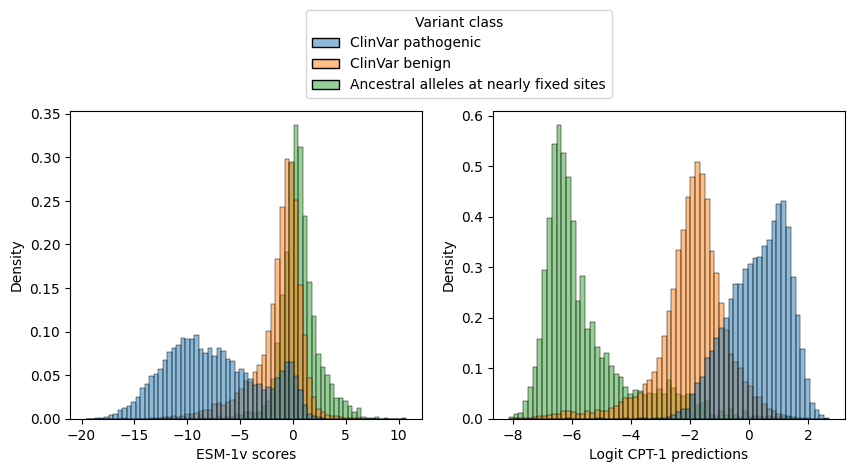

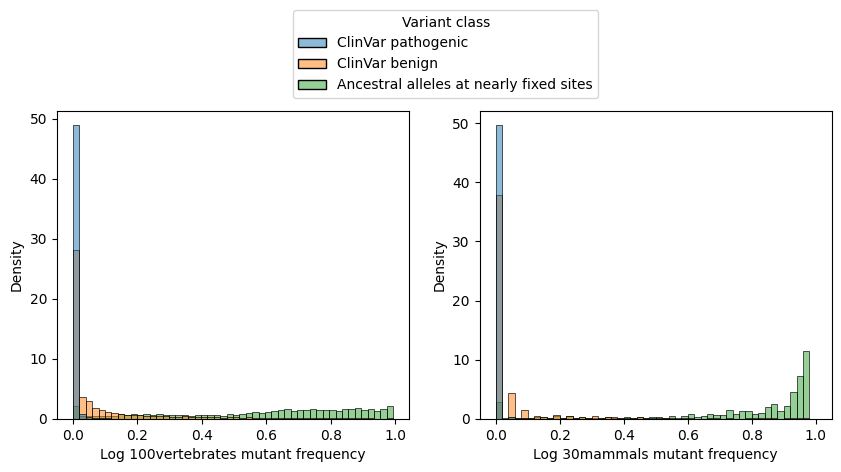

In [59]:
# Figure: ancestral alleles of human beneficial adaptation variants
ancestral_x = pd.read_csv('./data/ancestral_x_knn10.csv')
ancestral_x = ancestral_x.set_index('mutant')

# Get predictions
features = feat_selected_dms

cpt.train(feat_mat, label, all_genes, features)
pred_clinvar = cpt.predict(x[features])
pred_ancestral = cpt.predict(ancestral_x[features])

df_ps = pd.concat([x[['esm_1v']], ancestral_x[['esm_1v']]])
df_ps['transfer model'] = logit(1 - pd.concat([pred_clinvar, pred_ancestral]).values)
df_ps['variant class'] = pd.concat([y.iloc[:, 0].map({1.0: 'ClinVar pathogenic', 0.0: 'ClinVar benign'}),
                                    pd.Series('Ancestral alleles at nearly fixed sites', index = ancestral_x.index)])
df_ps.columns = ['ESM-1v scores', 'Logit CPT-1 predictions', 'Variant class']
df_ps['Log 100vertebrates mutant frequency'] = pd.concat([x[['100verte_mut_freq']], ancestral_x[['100verte_mut_freq']]])
df_ps['Log 30mammals mutant frequency'] = pd.concat([x[['30mammal_mut_freq']], ancestral_x[['30mammal_mut_freq']]])

# Plot
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(ax = axes[0], data = df_ps.reset_index(), x = "ESM-1v scores", 
             hue = "Variant class", stat = "density", common_norm = False)
sns.histplot(ax = axes[1], data = df_ps.reset_index(), x = "Logit CPT-1 predictions", 
             hue = "Variant class", stat = "density", common_norm = False)
sns.move_legend(axes[0], "upper left", bbox_to_anchor=(0.65, 1.35))
axes[1].legend([],[], frameon=False)
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(ax = axes[0], data = df_ps.reset_index(), x = "Log 100vertebrates mutant frequency", 
             hue = "Variant class", stat = "density", common_norm = False, bins = 50)
sns.histplot(ax = axes[1], data = df_ps.reset_index(), x = "Log 30mammals mutant frequency", 
             hue = "Variant class", stat = "density", common_norm = False, bins = 50)
sns.move_legend(axes[0], "upper left", bbox_to_anchor=(0.65, 1.35))
axes[1].legend([],[], frameon=False)
plt.show()